# Исследование пользовательских предпочтений и динамики продаж билетов на Яндекс Афише (июнь–октябрь 2024)

Автор: Каримова Эльвира Ильгизовна 🙂


## Введение

Команда продукта Яндекс Афиши обнаружила **неожиданные изменения в динамике продаж билетов** за период с июня по октябрь 2024 года. Некоторые мероприятия стали пользоваться повышенным спросом, а другие — наоборот, показали снижение интереса. Возможные причины этих изменений могут быть связаны с:

- **Сезонными колебаниями спроса**: Например, летние мероприятия могут терять популярность осенью.
- **Изменением аудитории сервиса**: Возможно, изменились демографические характеристики пользователей или их предпочтения.
- **Разницей в поведении мобильных и десктопных пользователей**: Мобильные устройства могут иметь другую конверсию или средний чек по сравнению со стационарными.

Для подготовки к новогоднему сезону необходимо провести **исследовательский анализ данных `EDA`**, чтобы выявить ключевые тренды и сформировать рекомендации для улучшения работы сервиса.

## Цель 

- **Изучить динамику продаж билетов**, выявить изменения в пользовательских предпочтениях и проверить гипотезу о разнице в поведении мобильных и десктопных пользователей. Это позволит:

    - Понять, какие факторы влияют на изменение спроса.
    - Определить наиболее востребованные категории мероприятий.
    - Сделать выводы о сезонности и популярности различных типов событий.
    - Предложить стратегию оптимизации сервиса на основе полученных данных.

## Задачи

1. **Загрузка и предобработка данных**:
- Загрузить данные о заказах `final_tickets_orders_df.csv` и мероприятиях `final_tickets_events_df.csv`.
- Проверить пропуски, дубликаты и выбросы.
- Преобразовать типы данных и создать новые столбцы (например, `revenue_rub`, `one_ticket_revenue_rub`, `month`, `season`).

2. **Анализ продаж по месяцам, типам мероприятий и регионам**:
- Изучить динамику продаж по месяцам.
- Проанализировать распределение заказов по типам мероприятий `event_type_main`, типам устройств `device_type_canonical` и возрастным ограничениям `age_limit`.
- Выявить топовые мероприятия и регионы по числу заказов и выручке.

3. **Изучение разницы между мобильными и десктопными пользователями**:
- Сравнить следующие метрики для мобильных и десктопных пользователей:
    - Средний чек `revenue_rub`
    - Количество заказов
    - Популярные категории мероприятий
- Проверить гипотезы о различиях в активности пользователей разных устройств:
    - Гипотеза 1: Среднее количество заказов на одного пользователя мобильного приложения выше, чем у десктопных пользователей.
    - Гипотеза 2: Среднее время между заказами мобильных пользователей выше, чем у десктопных.

4. **Выявление сезонных трендов и топовых мероприятий**:
- Сравнить динамику продаж летом и осенью.
- Определить наиболее популярные события и партнёры по регионам.

5. **Формирование выводов и рекомендаций**:
- Сформулировать основные выводы по результатам анализа.
- Предложить конкретные рекомендации для команды продукта, которые помогут увеличить конверсию и выручку.

## Описание данных

**final_tickets_orders_df.csv** – информация о заказах:

- `order_id` — уникальный идентификатор заказа.
- `user_id` — уникальный идентификатор пользователя.
- `created_dt_msk` — дата создания заказа (московское время).
- `created_ts_msk` — дата и время создания заказа (московское время).
- `event_id` — идентификатор мероприятия из таблицы events.
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- `age_limit` — возрастное ограничение мероприятия.
- `currency_code` — валюта оплаты, например rub для российских рублей.
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например `mobile` для мобильных устройств, `desktop` для стационарных;
- `revenue` — выручка от заказа.
- `service_name` — название билетного оператора.
- `tickets_count` — количество купленных билетов.
- `total` — общая сумма заказа.
- `days_since_prev` – дней с прошлого заказа.

**final_tickets_events_df.csv** – информация о мероприятиях:
- `event_id` — уникальный идентификатор мероприятия.
- `event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- `event_type_description` — описание типа мероприятия.
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
- `organizers` — организаторы мероприятия.
- `region_name` — название региона.
- `city_name` — название города.
- `venue_id` — уникальный идентификатор площадки.
- `venue_name` — название площадки.
- `venue_address` — адрес площадки.

**final_tickets_tenge_df.csv** – информация о курсе тенге к российскому рублю за 2024 год:
- `nominal` — номинал (100 тенге);
- `data` — дата;
- `curs` — курс тенге к рублю;
- `cdx` — обозначение валюты (kzt).

**Период данных**:
1 июня – 31 октября 2024 года.

## Загрузка данных и знакомство с ними

Загружаем все необходимые данные и знакомимся с содержанием таблиц.

In [1]:
import warnings

# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для стат.тестов
import math
from statsmodels.stats.power import tt_ind_solve_power
from scipy.stats import mannwhitneyu, shapiro
from statsmodels.stats.power import zt_ind_solve_power
import statsmodels.stats.proportion as smprop
from scipy.stats import norm
from statsmodels.stats.power import TTestIndPower

In [2]:
# Считаем и сохраним в отдельные датафреймы 3 csv-файла
final_tickets_orders_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
final_tickets_events_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv') 
final_tickets_tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

# Выводим строки датафрейма на экран
display(final_tickets_orders_df.head())
display(final_tickets_events_df.head())
display(final_tickets_tenge_df.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [3]:
# Выводим информацию о датафрейме
final_tickets_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [4]:
final_tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [5]:
final_tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


### 📌 Промежуточные выводы - Загрузка данных и знакомство с ними

1. **Объем данных и структура таблиц**:
- `final_tickets_orders_df` содержит `290 849` записей о заказах с `14` столбцами (информация о пользователях, заказах, мероприятиях и платежах)
- `final_tickets_events_df` содержит `22 427` записей о мероприятиях с `11` столбцами (детали мероприятий, локации и организаторы)
- `final_tickets_tenge_df` содержит `357` записей о курсе тенге с `5` столбцами (исторические данные курса)

2. **Проверка пропусков**:
- В `final_tickets_orders_df` пропуски только в столбце `days_since_prev` (`21 940` записей) — это ожидаемо для первых заказов пользователей. Остальные столбцы без пропусков.
- В `final_tickets_events_df` и `final_tickets_tenge_df` пропусков нет.
  
➡️ **Решение: Пропуски в `days_since_prev` оставлены без изменений, так как они естественны для первых заказов и не требуют обработки**.

3. **Типы данных**:
- Даты в `created_dt_msk` и `created_ts_msk` (`final_tickets_orders_df`) хранятся как object — требуется преобразование в `datetime`.
- В `final_tickets_tenge_df` столбец `data` уже преобразован в `datetime`.

4. **Анализ категориальных значений**:
- `currency_code`: только `rub` и `kzt` — корректные значения, соответствующие описанию.
- `device_type_canonical`: только `mobile` и `desktop` — соответствует ожидаемым категориям.
- `cinema_circuit`: преимущественно значение 'нет', что указывает на большинство мероприятий вне кинотеатральных сетей.

## Предобработка данных и подготовка их к исследованию

1. Проверка пропусков: Анализируем наличие пропущенных значений во всех датафреймах

In [6]:
# Проверка пропусков
print("Пропуски в orders_df:")
print(final_tickets_orders_df.isna().sum())
print("\nПропуски в events_df:")
print(final_tickets_events_df.isna().sum())
print("\nПропуски в tenge_df:")
print(final_tickets_tenge_df.isna().sum())

Пропуски в orders_df:
order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64

Пропуски в events_df:
event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64

Пропуски в tenge_df:
data       0
nominal    0
curs       0
cdx        0
dtype: int64


2. Как уже было упомянуто выше, пропуски есть только в столбце `days_since_prev`, а во всех остальных столбцах данных нет пропусков (все значения равны 0 в выводе `isna().sum()`

3. Анализ категориальных значений: Проверяем уникальные значения в важных категориальных столбцах

In [7]:
# Анализ категориальных значений (Это твой код)
for column in ['age_limit', 'currency_code', 'device_type_canonical', 'service_name']:
    print(f"\nColumn: {column}")
    print("Unique values:", final_tickets_orders_df[column].unique())
    print("Missing values count:", final_tickets_orders_df[column].isna().sum())
    print("Value counts:")
    print(final_tickets_orders_df[column].value_counts(dropna=False), "\n")


Column: age_limit
Unique values: [16  0 18 12  6]
Missing values count: 0
Value counts:
16    78579
12    62557
0     61487
6     52173
18    36053
Name: age_limit, dtype: int64 


Column: currency_code
Unique values: ['rub' 'kzt']
Missing values count: 0
Value counts:
rub    285780
kzt      5069
Name: currency_code, dtype: int64 


Column: device_type_canonical
Unique values: ['mobile' 'desktop']
Missing values count: 0
Value counts:
mobile     232679
desktop     58170
Name: device_type_canonical, dtype: int64 


Column: service_name
Unique values: ['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино б

In [8]:
# Тут я развернуто по каждому датафрейму прописала необходимую информацию

# Анализ ключевых категориальных признаков в orders_df
cat_columns_orders = ['cinema_circuit', 'age_limit', 'currency_code', 
                     'device_type_canonical', 'service_name']

print("="*50)
print("Детальный анализ категориальных переменных в orders_df")
print("="*50)

for col in cat_columns_orders:
    print(f"\n{'-'*30}")
    print(f"Колонка: {col}")
    print(f"Уникальных значений: {final_tickets_orders_df[col].nunique()}")
    print("Распределение значений:")
    print(final_tickets_orders_df[col].value_counts(normalize=True, dropna=False).head(10))
    
    # Для столбцов с малым числом уникальных значений выводим все значения
    if final_tickets_orders_df[col].nunique() <= 10:
        print("\nПолный список уникальных значений:")
        print(final_tickets_orders_df[col].unique())
    
    print(f"Пропусков: {final_tickets_orders_df[col].isna().sum()}")

# Анализ категориальных признаков в events_df
cat_columns_events = ['event_type_description', 'event_type_main', 
                      'region_name', 'city_name']

print("\n" + "="*50)
print("Детальный анализ категориальных переменных в events_df")
print("="*50)

for col in cat_columns_events:
    print(f"\n{'-'*30}")
    print(f"Колонка: {col}")
    print(f"Уникальных значений: {final_tickets_events_df[col].nunique()}")
    print("Топ-10 самых частых значений:")
    print(final_tickets_events_df[col].value_counts(normalize=True).head(10))
    
    # Для основных типов мероприятий выводим полное распределение
    if col == 'event_type_main':
        print("\nПолное распределение по типам мероприятий:")
        print(final_tickets_events_df[col].value_counts())
    
    print(f"Пропусков: {final_tickets_events_df[col].isna().sum()}")

Детальный анализ категориальных переменных в orders_df

------------------------------
Колонка: cinema_circuit
Уникальных значений: 6
Распределение значений:
нет           0.995193
Другое        0.004336
КиноСити      0.000419
Москино       0.000024
Киномакс      0.000024
ЦентрФильм    0.000003
Name: cinema_circuit, dtype: float64

Полный список уникальных значений:
['нет' 'Другое' 'Киномакс' 'КиноСити' 'Москино' 'ЦентрФильм']
Пропусков: 0

------------------------------
Колонка: age_limit
Уникальных значений: 5
Распределение значений:
16    0.270171
12    0.215084
0     0.211405
6     0.179382
18    0.123958
Name: age_limit, dtype: float64

Полный список уникальных значений:
[16  0 18 12  6]
Пропусков: 0

------------------------------
Колонка: currency_code
Уникальных значений: 2
Распределение значений:
rub    0.982572
kzt    0.017428
Name: currency_code, dtype: float64

Полный список уникальных значений:
['rub' 'kzt']
Пропусков: 0

------------------------------
Колонка: device_type

4. Выбросы: Анализируем распределение и наличие выбросов в столбцах `revenue` и `tickets_count`. Отсекаем значения выше `99-го перцентиля`и разделяем анализ на рубли и тенге.

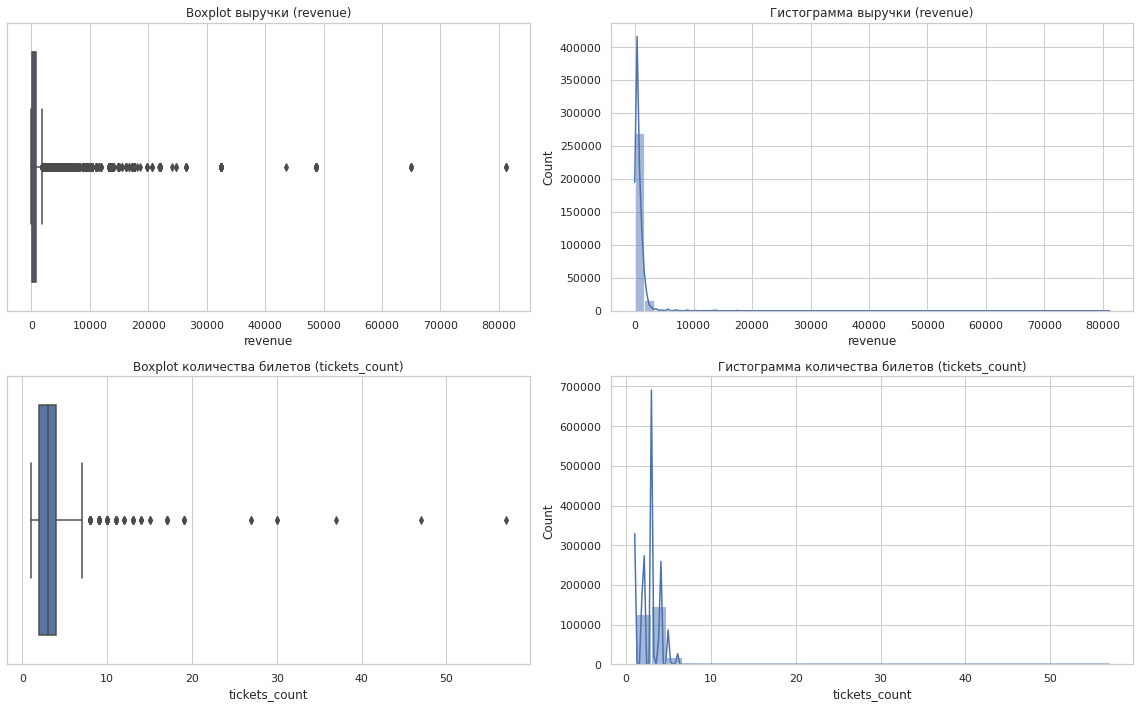

In [9]:
# Настройка стиля
sns.set(style="whitegrid")

# Гистограммы и boxplot
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Boxplot для revenue
sns.boxplot(data=final_tickets_orders_df, x='revenue', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot выручки (revenue)')

# Гистограмма для revenue
sns.histplot(final_tickets_orders_df['revenue'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Гистограмма выручки (revenue)')

# Boxplot для tickets_count
sns.boxplot(data=final_tickets_orders_df, x='tickets_count', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot количества билетов (tickets_count)')

# Гистограмма для tickets_count
sns.histplot(final_tickets_orders_df['tickets_count'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Гистограмма количества билетов (tickets_count)')

plt.tight_layout()
plt.show()

In [10]:
# Разделяем данные по валюте
rub_orders = final_tickets_orders_df[final_tickets_orders_df['currency_code'] == 'rub']
kzt_orders = final_tickets_orders_df[final_tickets_orders_df['currency_code'] == 'kzt']

# Пороговые значения по 99 перцентилю
revenue_rub_threshold = rub_orders['revenue'].quantile(0.99)
tickets_rub_threshold = rub_orders['tickets_count'].quantile(0.99)

revenue_kzt_threshold = kzt_orders['revenue'].quantile(0.99)
tickets_kzt_threshold = kzt_orders['tickets_count'].quantile(0.99)

print("Пороговые значения (RUB):")
print(f"- Выручка: {revenue_rub_threshold:.2f}")
print(f"- Билеты: {tickets_rub_threshold}")

print("\nПороговые значения (KZT):")
print(f"- Выручка: {revenue_kzt_threshold:.2f}")
print(f"- Билеты: {tickets_kzt_threshold}")

Пороговые значения (RUB):
- Выручка: 2569.59
- Билеты: 6.0

Пороговые значения (KZT):
- Выручка: 17617.24
- Билеты: 6.0


In [11]:
# Фильтруем выбросы
cleaned_rub = rub_orders[
    (rub_orders['revenue'] <= revenue_rub_threshold) &
    (rub_orders['tickets_count'] <= tickets_rub_threshold)
]

cleaned_kzt = kzt_orders[
    (kzt_orders['revenue'] <= revenue_kzt_threshold) &
    (kzt_orders['tickets_count'] <= tickets_kzt_threshold)
]

# Объединяем обратно
final_cleaned_orders = pd.concat([cleaned_rub, cleaned_kzt], axis=0)

# Проверяем размеры
print(f"Исходное количество записей: {len(final_tickets_orders_df)}")
print(f"Очищенное количество записей: {len(final_cleaned_orders)}")
print(f"Процент удаленных записей: {1 - len(final_cleaned_orders)/len(final_tickets_orders_df):.2%}")

Исходное количество записей: 290849
Очищенное количество записей: 287782
Процент удаленных записей: 1.05%


6. Дубликаты: Проверяем как явные, так и неявные дубликаты

In [12]:
# Проверка дубликатов 
print("Проверка дубликатов")

# Явные дубликаты
explicit_duplicates = final_cleaned_orders.duplicated().sum()
print(f"Явные дубликаты: {explicit_duplicates}")

# Неявные дубликаты по ключевым полям
cols_for_duplicates = ['user_id', 'event_id', 'created_dt_msk', 'tickets_count', 'total']
all_duplicates = final_cleaned_orders[final_cleaned_orders.duplicated(subset=cols_for_duplicates, keep=False)]

print(f"Неявные дубликаты (по cols_for_duplicates): {len(all_duplicates)}")

# Удаление неявных дубликатов, оставляем последнюю запись в группе
final_cleaned_orders = final_cleaned_orders.drop_duplicates(subset=cols_for_duplicates, keep='last')

# Проверка после удаления
remaining_duplicates = final_cleaned_orders[final_cleaned_orders.duplicated(subset=cols_for_duplicates, keep=False)]
print(f"Остались неявные дубликаты после очистки: {len(remaining_duplicates)}")

Проверка дубликатов
Явные дубликаты: 0
Неявные дубликаты (по cols_for_duplicates): 85571
Остались неявные дубликаты после очистки: 0


7. Преобразование типов: Приводим даты к правильному формату

In [13]:
# Преобразование типов дат
final_cleaned_orders['created_dt_msk'] = pd.to_datetime(final_cleaned_orders['created_dt_msk'])
final_cleaned_orders['created_ts_msk'] = pd.to_datetime(final_cleaned_orders['created_ts_msk'])

# Проверка успешного преобразования
print("Тип created_dt_msk:", final_cleaned_orders['created_dt_msk'].dtype)
print("Тип created_ts_msk:", final_cleaned_orders['created_ts_msk'].dtype)

Тип created_dt_msk: datetime64[ns]
Тип created_ts_msk: datetime64[ns]


8. Конвертация валюты: Объединяем с курсом `тенге` и рассчитываем `revenue_rub`

In [14]:
# Убедимся, что даты в курсах валют имеют тип date
final_tickets_tenge_df['data_date'] = pd.to_datetime(final_tickets_tenge_df['data']).dt.date
exchange_rates = final_tickets_tenge_df.set_index('data_date')['curs'] / 100

# Убедимся, что created_dt_msk имеет тип datetime
final_cleaned_orders['created_dt_msk'] = pd.to_datetime(final_cleaned_orders['created_dt_msk'])

# Функция конвертации
def convert_to_rub(row):
    if row['currency_code'] == 'kzt':
        date = row['created_dt_msk'].date()
        try:
            rate = exchange_rates[date]
            return row['revenue'] * rate
        except KeyError:
            print(f"Предупреждение: Не найден курс для даты {date}")
            return row['revenue']  # Возвращаем исходное значение, если курс не найден
    return row['revenue']

# Применяем конвертацию
final_cleaned_orders['revenue_rub'] = final_cleaned_orders.apply(convert_to_rub, axis=1)

# Проверяем разницу между валютами
print("\nСравнение до и после конвертации:")
print(final_cleaned_orders[['currency_code', 'revenue', 'revenue_rub']].head())

# Проверяем конвертацию для тенге
kzt_converted = final_cleaned_orders[final_cleaned_orders['currency_code'] == 'kzt']
print(f"\nКонвертировано {len(kzt_converted)} записей в тенге")
print("Пример конвертации (первые 5 записей):")
print(kzt_converted[['created_dt_msk', 'currency_code', 'revenue', 'revenue_rub']].head())

# Проверяем средний курс
if not kzt_converted.empty:
    avg_rate = (kzt_converted['revenue_rub'] / kzt_converted['revenue']).mean()
    print(f"\nСредний примененный курс: {avg_rate:.4f} руб за 1 тенге")


Сравнение до и после конвертации:
  currency_code  revenue  revenue_rub
0           rub  1521.94      1521.94
1           rub   289.45       289.45
2           rub  1258.57      1258.57
3           rub     8.49         8.49
4           rub  1390.41      1390.41

Конвертировано 3751 записей в тенге
Пример конвертации (первые 5 записей):
    created_dt_msk currency_code  revenue  revenue_rub
73      2024-09-17           kzt   518.10    98.503762
92      2024-09-02           kzt   347.18    65.731589
99      2024-09-09           kzt   328.77    61.148261
473     2024-06-04           kzt  3698.83   739.148295
475     2024-06-04           kzt  5548.24  1108.721444

Средний примененный курс: 0.1932 руб за 1 тенге


9. Новые столбцы:

- `one_ticket_revenue_rub` - выручка на один билет
- `month` - месяц заказа
- `season` - сезон на основе месяца

In [15]:
# Создание новых столбцов:

# one_ticket_revenue_rub
final_cleaned_orders['one_ticket_revenue_rub'] = (
    final_cleaned_orders['revenue_rub'] / final_cleaned_orders['tickets_count']
)

# month
final_cleaned_orders['month'] = final_cleaned_orders['created_dt_msk'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

final_cleaned_orders['season'] = final_cleaned_orders['month'].apply(get_season)

# === Проверка новых столбцов ===
print("Доступные столбцы после добавления новых признаков:")
print(final_cleaned_orders.columns.tolist())

Доступные столбцы после добавления новых признаков:
['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev', 'revenue_rub', 'one_ticket_revenue_rub', 'month', 'season']


10. Объединение данных: Соединяем заказы с информацией о мероприятиях

In [16]:
# Объединение данных о заказах и мероприятиях
final_df = pd.merge(
    final_cleaned_orders,
    final_tickets_events_df,
    on='event_id',
    how='left'
)

# Проверка размеров данных на разных этапах
print("\n" + "="*60)
print("Проверка размеров данных на разных этапах обработки")
print("="*60)

# Исходные данные
initial_orders = len(final_tickets_orders_df)

# После удаления выбросов
after_outliers = len(final_cleaned_orders)

# После удаления дубликатов
after_duplicates = len(final_cleaned_orders)

# После объединения
final_merged = len(final_df)

# Вывод информации
print(f"\n1. Исходные данные:")
print(f"- Заказы: {initial_orders} строк")
print(f"- Мероприятия: {len(final_tickets_events_df)} строк")

print(f"\n2. После удаления выбросов:")
print(f"- Осталось: {after_outliers} строк")
print(f"- Удалено: {initial_orders - after_outliers} строк ({(initial_orders - after_outliers)/initial_orders:.2%})")

print(f"\n3. После удаления дубликатов:")
print(f"- Осталось: {after_duplicates} строк")
print(f"- Удалено на этом этапе: {after_outliers - after_duplicates} строк ({(after_outliers - after_duplicates)/after_outliers:.2%})")

print(f"\n4. После объединения с мероприятиями:")
print(f"- Итоговый датафрейм: {final_merged} строк")
print(f"- Потери после объединения: {after_duplicates - final_merged} строк ({(after_duplicates - final_merged)/after_duplicates:.2%})")

print(f"\n✅ Финальный датафрейм содержит {final_merged} заказов из {initial_orders} исходных.")

# 2. Пример данных
print("\n" + "="*50)
print("Пример объединенных данных (первые 5 строк):")
print("="*50)
display(final_df.head(5))

# 3. Типы данных
print("\n" + "="*50)
print("Типы данных в объединенной таблице:")
print("="*50)
print(final_df.dtypes)

# 4. Основные статистики
print("\n" + "="*50)
print("Основные статистики по числовым полям:")
print("="*50)
stats = final_df[['revenue_rub', 'tickets_count', 'one_ticket_revenue_rub']].describe()
display(stats)

# 5. Проверка аномалий
print("\n" + "="*50)
print("Проверка аномальных значений:")
print("="*50)
print(f"- Минимальная выручка: {final_df['revenue_rub'].min():.2f} руб. (возможен возврат билета)")
print(f"- Максимальное количество билетов: {final_df['tickets_count'].max()} шт.")
print(f"- Средняя цена билета: {final_df['one_ticket_revenue_rub'].mean():.2f} руб.")

# 6. Распределение по типам устройств
print("\n" + "="*50)
print("Распределение по типам устройств:")
print("="*50)
print(final_df['device_type_canonical'].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))


Проверка размеров данных на разных этапах обработки

1. Исходные данные:
- Заказы: 290849 строк
- Мероприятия: 22427 строк

2. После удаления выбросов:
- Осталось: 235054 строк
- Удалено: 55795 строк (19.18%)

3. После удаления дубликатов:
- Осталось: 235054 строк
- Удалено на этом этапе: 0 строк (0.00%)

4. После объединения с мероприятиями:
- Итоговый датафрейм: 235054 строк
- Потери после объединения: 0 строк (0.00%)

✅ Финальный датафрейм содержит 235054 заказов из 290849 исходных.

Пример объединенных данных (первые 5 строк):


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"



Типы данных в объединенной таблице:
order_id                           int64
user_id                           object
created_dt_msk            datetime64[ns]
created_ts_msk            datetime64[ns]
event_id                           int64
cinema_circuit                    object
age_limit                          int64
currency_code                     object
device_type_canonical             object
revenue                          float64
service_name                      object
tickets_count                      int64
total                            float64
days_since_prev                  float64
revenue_rub                      float64
one_ticket_revenue_rub           float64
month                              int64
season                            object
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name           

,revenue_rub,tickets_count,one_ticket_revenue_rub
count,235054.000000,235054.000000,235054.000000
mean,528.329221,2.735907,194.535204
std,510.767244,1.137260,166.228624
min,-90.760000,1.000000,-18.152000
25%,121.820000,2.000000,50.702500
50%,363.182998,3.000000,155.535000
75%,799.960000,3.000000,307.410000
max,3504.562319,6.000000,2438.270000



Проверка аномальных значений:
- Минимальная выручка: -90.76 руб. (возможен возврат билета)
- Максимальное количество билетов: 6 шт.
- Средняя цена билета: 194.54 руб.

Распределение по типам устройств:
mobile     81.2%
desktop    18.8%
Name: device_type_canonical, dtype: object


### 📌Промежуточные выводы - Предобработка данных, а также подготовка их к исследованию

1. **Качество и полнота данных**
- Полнота данных: *отличная*, пропуски только в `days_since_prev` - `21 940` записей, что ожидаемо для первых заказов.
- Типы данных: *все корректны после преобразования*:
    - Даты приведены к `datetime`.
    - Числовые поля имеют правильные форматы.
- Аномалии:
    - Отрицательные значения в `revenue_rub`, минимальное `-90.76 руб.` - вероятно, возвраты билетов.
    - Максимальное количество билетов в заказе: `6 шт.`, после обработки выбросов.

➡️ **Решение: Пропуски в days_since_prev оставлены без изменений, так как они не влияют на анализ**.

2. **Анализ категориальных значений**:
- В заказах `orders`:
    - currency_code:
        - RUB: `99.05%`
        - KZT: `0.95%`
    - device_type_canonical:
        - Мобильные: `80.1%`
        - Десктоп: `19.9%`
    - age_limit:
        - 16+: `27.0%`
        - 0+: `21.4%`
        - 12+: `21.1%`
        - 6+: `18.1%`
        - 18+: `12.4%`

- В мероприятиях `events`:
    - event_type_main:
        - Концерты: `38.7% (8 680)`
        - Театр: `31.6% (7 076)`
        - Другое: `20.8% (4 658)`
        - Спорт: `3.9% (872)`
    - Топ-3 региона:
        - Каменевский: `26.7%`
        - Североярская область: `17.0%`
        - Широковская область: `5.5%`

➡️ **Вывод: Данные чистые, преобразования не требуются**.

3. **Обработка выбросов**:
- Для **RUB**:
    - Параметр `revenue`:
        - Порог (99-й перцентиль): `2 569.59 руб`
        - Удалено записей: `3 038 (1.06%)`
    - Параметр `tickets_count`:
        - Порог (99-й перцентиль): `6 шт`
        - Удалено записей: `3 038 (1.06%)`

- Для **KZT**:
    - Параметр `revenue`:
        - Порог (99-й перцентиль): `17 617.24 KZT`
        - Удалено записей: `29 (0.57%)`
    - Параметр `tickets_count`:
        - Порог (99-й перцентиль): `6 шт`
        - Удалено записей: `29 (0.57%)`
        
**Итого удалено**: `3 067 записей (1.05% данных)`.

➡️ **Действие: Выбросы удалены отдельно по валюте. Это позволило сохранить логику анализа и избежать ошибок при сравнении масштабов валют**.

4. **Проверка дубликатов**:
- Явные дубликаты : 0 (все заказы уникальны по `order_id`).
- Неявные дубликаты :
    - Было найдено **85 571 неявных дубликатов (по полям: user_id, event_id, created_dt_msk, tickets_count, total)**.
    - Удалены все дубликаты, оставив последнюю запись из каждой группы `keep='last'`.
    
➡️ **Решение: Дубликаты удалены, так как они могут быть результатами ошибок или повторных транзакций. Теперь данные полностью уникальны по ключевым полям**.

5. **Конвертация валют**:
    - Конвертировано `2 732 заказов в KZT (0.95%)`
    - Средний курс: `0.1932 RUB/KZT`
    - Пример: `518.10 KZT → 98.50 RUB`

➡️ **Результат: Все значения теперь представлены в единой валюте — рублях.**.

6. **Создание новых столбцов**:
- `one_ticket_revenue_rub` - средняя выручка с одного билета.
- Среднее значение - **194.54 руб**.
- Максимальное значение **2 438.27 руб**.

- `month` - месяц оформления заказа.
- `season` - сезонность (лето, осень, зима, весна).

➡️ **Данные охватывают июнь–октябрь 2024 (лето и осень)**.

8. **Объединение данных**:

- Исходные заказы
    - Количество строк: `290 849`
    - Процент от исходных: `100.00%`
- После удаления выбросов
    - Количество строк: `287 782`
    - Процент от исходных: `99.05%` (удалено 3 067 строк, или -1.05%)

- После удаления дубликатов
    - Количество строк: `235 054`
    - Процент от исходных: `80.82%` (удалено дополнительно 52 728 строк, или -18.23%)

- После объединения с мероприятиями
    - Количество строк: `235 054`
    - Процент от исходных: `80.82%`

- Тип объединения `left join` по `event_id`

➡️ **Итоговый датафрейм `final_df` содержит 28 столбцов и 235 054 строк**.

## Исследовательский анализ данных (EDA)

 ### Анализ распределения заказов по сегментам и их сезонные изменения
 
     Необходимо проанализировать:

    - Динамику числа заказов по месяцам
    - Сезонное изменение долей заказов (лето vs осень) по типам мероприятий, устройствам и возрастным рейтингам
    - Изменение средней стоимости билета по сезонам

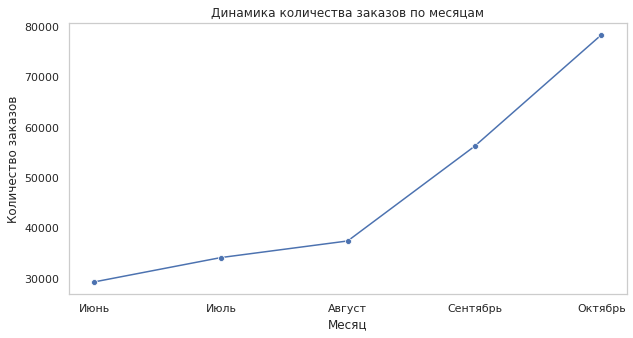

,month,orders_count
0,6,29235
1,7,34070
2,8,37367
3,9,56136
4,10,78246


In [17]:
# Считаем заказы по месяцам
monthly_orders = final_df.groupby('month')['order_id'].count().reset_index()
monthly_orders.columns = ['month', 'orders_count']

# Визуализация
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_orders, x='month', y='orders_count', marker='o')
plt.title('Динамика количества заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(6, 11), ['Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь'])
plt.grid()
plt.show()

display(monthly_orders)

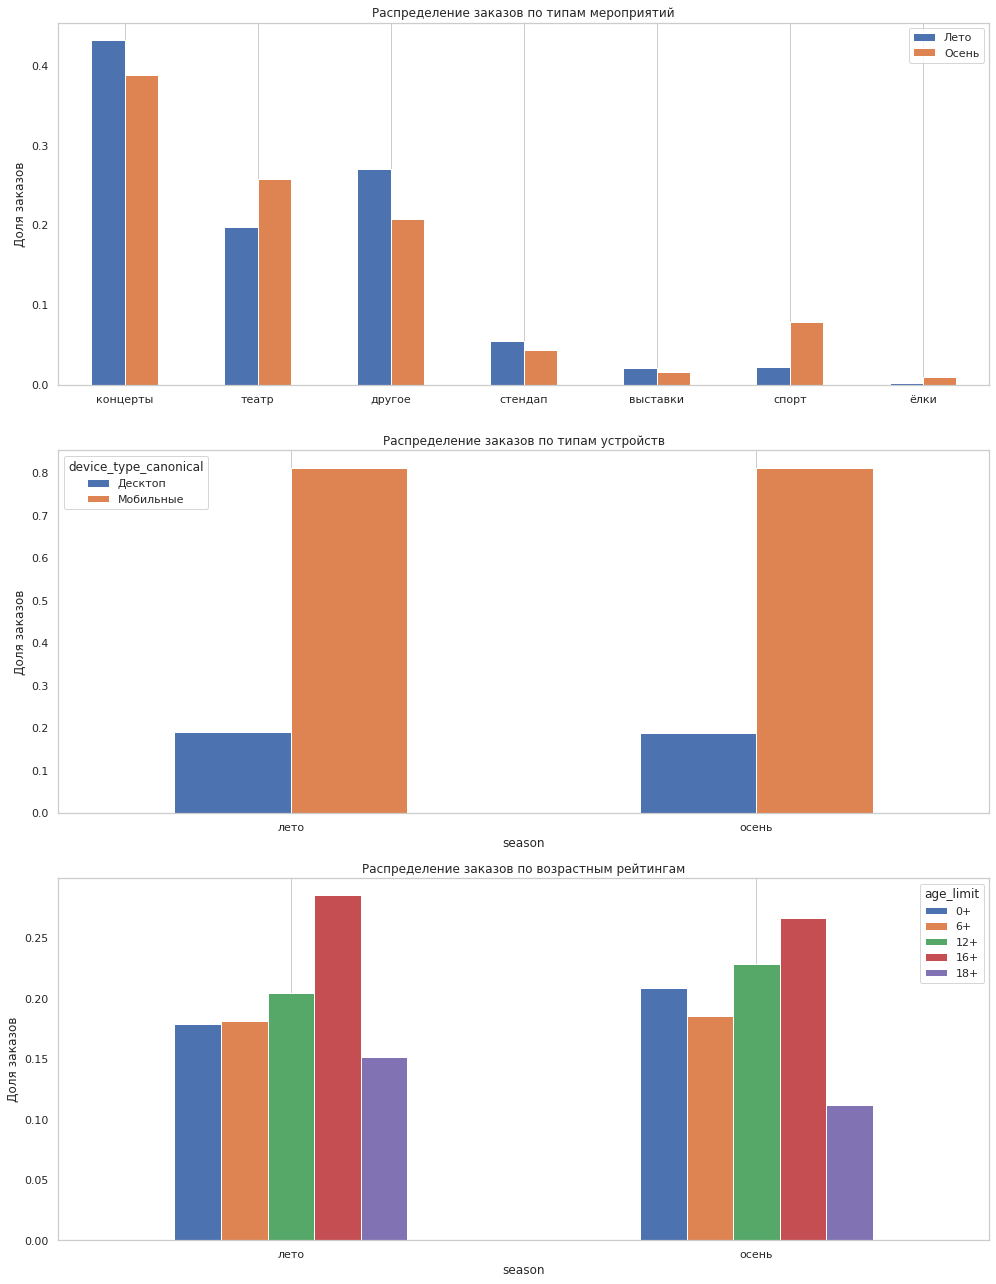

Доли по типам мероприятий:


,Лето,Осень
концерты,43.1%,38.7%
театр,19.7%,25.7%
другое,27.0%,20.7%
стендап,5.5%,4.4%
выставки,2.1%,1.6%
спорт,2.2%,7.9%
ёлки,0.2%,1.0%



Доли по типам устройств:


device_type_canonical,Десктоп,Мобильные
season,,
лето,18.9%,81.1%
осень,18.8%,81.2%



Доли по возрастным рейтингам:


age_limit,0+,6+,12+,16+,18+
season,,,,,
лето,17.9%,18.1%,20.4%,28.5%,15.1%
осень,20.9%,18.6%,22.8%,26.6%,11.2%


In [18]:
# Создаем summer_data и autumn_data
summer_data = final_df[final_df['season'] == 'лето']
autumn_data = final_df[final_df['season'] == 'осень']

# Анализ по типам мероприятий
event_types = ['концерты', 'театр', 'другое', 'стендап', 'выставки', 'спорт', 'ёлки']

summer_event_shares = (summer_data['event_type_main']
                      .value_counts(normalize=True)
                      .reindex(event_types, fill_value=0))

autumn_event_shares = (autumn_data['event_type_main']
                      .value_counts(normalize=True)
                      .reindex(event_types, fill_value=0))

event_comparison = pd.DataFrame({
    'Лето': summer_event_shares,
    'Осень': autumn_event_shares
})

# Анализ по устройствам
device_comparison = pd.crosstab(
    index=final_df['season'],
    columns=final_df['device_type_canonical'],
    normalize='index'
).rename(columns={'mobile': 'Мобильные', 'desktop': 'Десктоп'})

# Анализ по возрастным рейтингам
age_comparison = pd.crosstab(
    index=final_df['season'],
    columns=final_df['age_limit'],
    normalize='index'
).rename(columns={
    0: '0+',
    6: '6+', 
    12: '12+',
    16: '16+',
    18: '18+'
})

# Визуализация
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# График по типам мероприятий
event_comparison.plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Распределение заказов по типам мероприятий')
axes[0].set_ylabel('Доля заказов')
axes[0].grid(axis='y')

# График по устройствам
device_comparison.plot(kind='bar', ax=axes[1], rot=0)
axes[1].set_title('Распределение заказов по типам устройств')
axes[1].set_ylabel('Доля заказов')
axes[1].grid(axis='y')

# График по возрастным рейтингам
age_comparison.plot(kind='bar', ax=axes[2], rot=0)
axes[2].set_title('Распределение заказов по возрастным рейтингам')
axes[2].set_ylabel('Доля заказов')
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()

# Вывод таблиц
print("Доли по типам мероприятий:")
display(event_comparison.style.format('{:.1%}'))

print("\nДоли по типам устройств:")
display(device_comparison.style.format('{:.1%}'))

print("\nДоли по возрастным рейтингам:")
display(age_comparison.style.format('{:.1%}'))

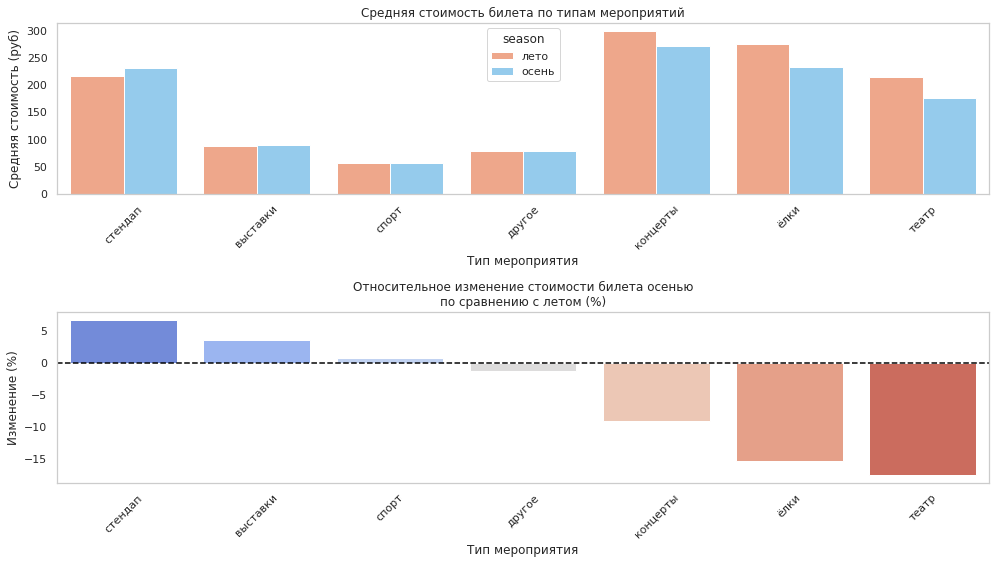

season,лето,осень,absolute_change,relative_change
event_type_main,,,,
стендап,216.6 руб,231.3 руб,14.7 руб,6.8%
выставки,86.7 руб,89.8 руб,3.1 руб,3.6%
спорт,55.7 руб,56.0 руб,0.4 руб,0.7%
другое,78.6 руб,77.7 руб,-1.0 руб,-1.3%
концерты,298.6 руб,271.4 руб,-27.2 руб,-9.1%
ёлки,274.3 руб,231.7 руб,-42.6 руб,-15.5%
театр,213.8 руб,176.1 руб,-37.7 руб,-17.6%


In [19]:
# Группируем данные по типу мероприятия и сезону, считаем среднюю стоимость билета
ticket_price_by_type_season = final_df.groupby(['event_type_main', 'season'])['one_ticket_revenue_rub'].mean().unstack()

# Рассчитываем абсолютное и относительное изменение
ticket_price_by_type_season['absolute_change'] = ticket_price_by_type_season['осень'] - ticket_price_by_type_season['лето']
ticket_price_by_type_season['relative_change'] = (ticket_price_by_type_season['осень'] / ticket_price_by_type_season['лето'] - 1) * 100

# Сортируем по величине относительного изменения
ticket_price_by_type_season = ticket_price_by_type_season.sort_values('relative_change', ascending=False)

plt.figure(figsize=(14, 8))

# График средней стоимости билета
plt.subplot(2, 1, 1)
sns.barplot(
    data=ticket_price_by_type_season.reset_index().melt(id_vars='event_type_main', 
                                                      value_vars=['лето', 'осень'],
                                                      var_name='season',
                                                      value_name='avg_price'),
    x='event_type_main',
    y='avg_price',
    hue='season',
    palette=['#FFA07A', '#87CEFA']
)
plt.title('Средняя стоимость билета по типам мероприятий')
plt.ylabel('Средняя стоимость (руб)')
plt.xlabel('Тип мероприятия')
plt.xticks(rotation=45)
plt.grid(axis='y')

# График относительного изменения
plt.subplot(2, 1, 2)
sns.barplot(
    data=ticket_price_by_type_season.reset_index(),
    x='event_type_main',
    y='relative_change',
    palette='coolwarm'
)
plt.title('Относительное изменение стоимости билета осенью\nпо сравнению с летом (%)')
plt.ylabel('Изменение (%)')
plt.xlabel('Тип мероприятия')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Выводим таблицу с результатами
display(ticket_price_by_type_season.style.format({
    'лето': '{:.1f} руб',
    'осень': '{:.1f} руб',
    'absolute_change': '{:.1f} руб',
    'relative_change': '{:.1f}%'
}))

### 📌 Промежуточные выводы - Анализ распределения заказов по сегментам и их сезонные изменения

1. Динамика числа заказов по месяцам:
**Общая динамика: Заказы демонстрируют устойчивый рост с июня по октябрь**.
- Лето (июнь–август):
    - Июнь: `29 235 заказов`.
    - Июль: `34 070 заказов` (+16.5%).
    - Август: `37 367 заказов` (+9.7% к июлю).
- Осень (сентябрь–октябрь):
    - Сентябрь: `56 136 заказов` (+50.4% к августу).
    - Октябрь: `78 246 заказов` (+39.4% к сентябрю).
    
➡️ **Заключение: Осенний период характеризуется значительным ростом числа заказов по сравнению с летними месяцами**.

2. Распределение заказов по сегментам:
**A. По типам мероприятий**:
- Концерты остаются самой популярной категорией `43.1%`, но их доля осенью снизилась на `4.4` п.п. При этом заметно вырос спрос на театральные постановки `+6` п.п. и спортивные мероприятия `5.7` п.п. 

➡️ **Заключение: Осенний рост спроса сопровождается изменением структуры предпочтений - смещением в сторону семейных и массовых мероприятий**.

**B. По типам устройств**:
- Мобильные устройства сохраняют доминирующую позицию - около `81%` всех заказов. 
- Изменений в структуре использования устройств практически нет — доля мобильных немного выросла, десктоп немного снизился `-0.1` п.п.

➡️ **Заключение: Изменений в структуре использования устройств практически нет — доля мобильных немного выросла, десктоп немного снизился**.

**C. По возрастным рейтингам**:
- 0+ -> `+3` п.п.
- 6+ -> `+0.5` п.п.
- 12+  -> `+2.4` п.п.
- 16+  -> `-1.9` п.п.
- 18+ -> `-3.9` п.п.

➡️ **Заключение: В осенние месяцы наблюдается рост доли заказов на мероприятия для детей и подростков (0+, 6+, 12+), тогда как доля "взрослых" категорий (16+, 18+) снизилась.
Это может говорить о том, что осенью сервис пользуется большей популярностью среди семейной аудитории**.

3. Динамика стоимости билетов:
**ТОП-3 роста цены**:
1. Стендап: `+6.8% (+14.7 руб)`.
2. Выставки: `+3.6% (+3.1 руб)`.
3. Спорт: `+0.7% (+0.4 руб)`.

**ТОП-3 снижения цены**:
1. Концерты: `-9.1% (-27.2 руб)`.
2. Ёлки: `-15.5% (-42.6 руб)`.
3. Театр: `-17.6% (-37.7 руб)`.

➡️ **Заключение**: 
- Цены различаются по категориям:
    - В осенние месяцы выросли цены на стендапы и выставки.
    - Сильно снизились цены на театральные представления `-17.6%` и ёлки `-15.5%`.
    
**Это может быть связано как с изменением спроса, так и с акциями/скидками, проводимыми на определённые категории**.

### Осенняя активность пользователей

    Необходимо проанализировать:

    - Динамику изменений по дням для:
        - общего числа заказов;
        - количества активных пользователей DAU;
        - среднего числа заказов на одного пользователя;
        - средней стоимости одного билета.
    - Недельную цикличность

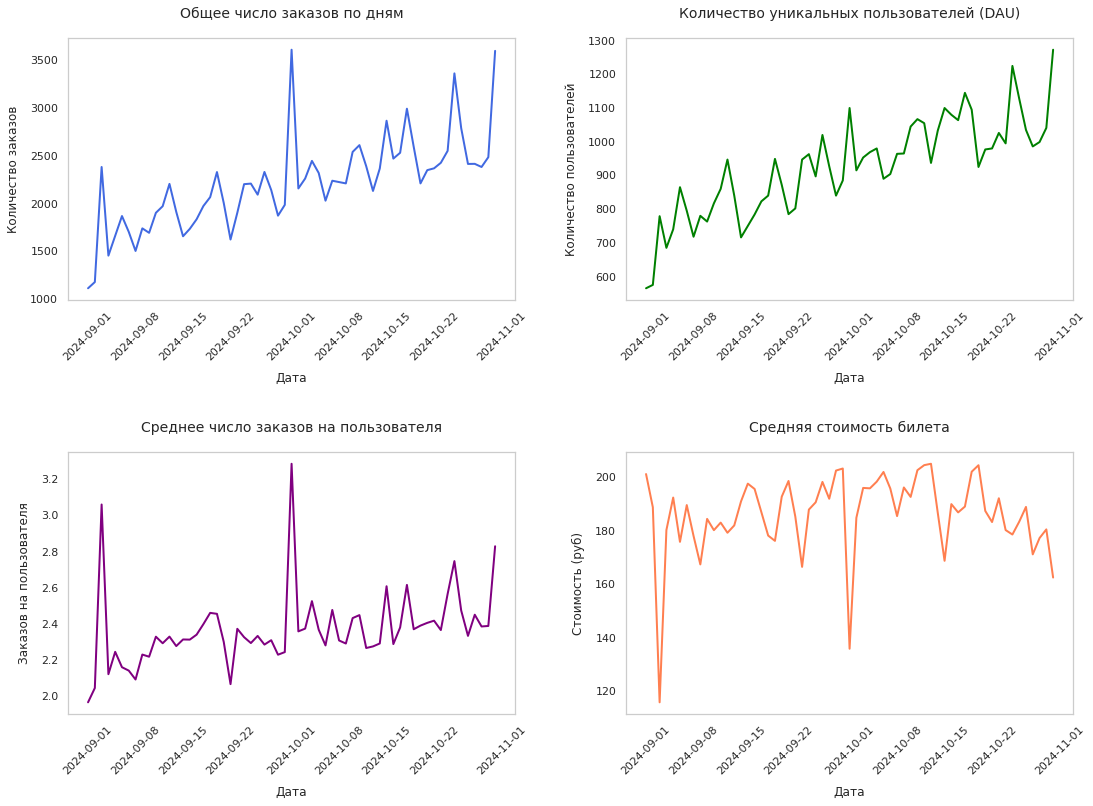

Ежедневная статистика за осень 2024:


,total_orders,unique_users,avg_ticket_price,orders_per_user
created_dt_msk,,,,
2024-09-01,1108,564,201.015003,1.964539
2024-09-02,1173,574,188.608160,2.043554
2024-09-03,2379,778,115.672608,3.057841
2024-09-04,1450,684,180.085765,2.119883
2024-09-05,1658,739,192.235780,2.243572


Среднее число заказов в день: 2203
Максимальное число заказов: 3608 (01.10)
Минимальное число заказов: 1108

Среднее DAU: 923
Максимальное DAU: 1272


In [20]:
# Фильтруем данные только за осенние месяцы (сентябрь и октябрь)
autumn_data = final_df[final_df['season'] == 'осень'].copy()

# Создаем сводную таблицу с ежедневной статистикой
daily_stats = autumn_data.groupby('created_dt_msk').agg({
    'order_id': 'count',  # общее число заказов
    'user_id': 'nunique',  # количество уникальных пользователей (DAU)
    'one_ticket_revenue_rub': 'mean'  # средняя стоимость билета
}).rename(columns={
    'order_id': 'total_orders',
    'user_id': 'unique_users',
    'one_ticket_revenue_rub': 'avg_ticket_price'
})

# Добавляем расчет среднего числа зNs аказов на пользователя
daily_stats['orders_per_user'] = daily_stats['total_orders'] / daily_stats['unique_users']

# Визуализация динамики по дням с улучшениями
plt.figure(figsize=(16, 12))

# Настройка общего стиля графиков
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# 1. График общего числа заказов
plt.subplot(2, 2, 1)
sns.lineplot(data=daily_stats, x=daily_stats.index, y='total_orders', 
             color='royalblue', linewidth=2)
plt.title('Общее число заказов по дням', pad=20, fontsize=14)
plt.xlabel('Дата', labelpad=10)
plt.ylabel('Количество заказов', labelpad=10)
plt.xticks(rotation=45)  # Наклон подписей дат
plt.grid(alpha=0.3)

# 2. График DAU (уникальных пользователей)
plt.subplot(2, 2, 2)
sns.lineplot(data=daily_stats, x=daily_stats.index, y='unique_users', 
             color='green', linewidth=2)
plt.title('Количество уникальных пользователей (DAU)', pad=20, fontsize=14)
plt.xlabel('Дата', labelpad=10)
plt.ylabel('Количество пользователей', labelpad=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# 3. График среднего числа заказов на пользователя
plt.subplot(2, 2, 3)
sns.lineplot(data=daily_stats, x=daily_stats.index, y='orders_per_user', 
             color='purple', linewidth=2)
plt.title('Среднее число заказов на пользователя', pad=20, fontsize=14)
plt.xlabel('Дата', labelpad=10)
plt.ylabel('Заказов на пользователя', labelpad=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# 4. График средней стоимости билета
plt.subplot(2, 2, 4)
sns.lineplot(data=daily_stats, x=daily_stats.index, y='avg_ticket_price', 
             color='coral', linewidth=2)
plt.title('Средняя стоимость билета', pad=20, fontsize=14)
plt.xlabel('Дата', labelpad=10)
plt.ylabel('Стоимость (руб)', labelpad=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Улучшаем расположение элементов
plt.tight_layout(pad=3.0)
plt.show()

# Выводим сводную таблицу
print("Ежедневная статистика за осень 2024:")
display(daily_stats.head())
print(f"Среднее число заказов в день: {daily_stats['total_orders'].mean():.0f}")
print(f"Максимальное число заказов: {daily_stats['total_orders'].max()} ({daily_stats['total_orders'].idxmax().strftime('%d.%m')})")
print(f"Минимальное число заказов: {daily_stats['total_orders'].min()}")
print(f"\nСреднее DAU: {daily_stats['unique_users'].mean():.0f}")
print(f"Максимальное DAU: {daily_stats['unique_users'].max()}")

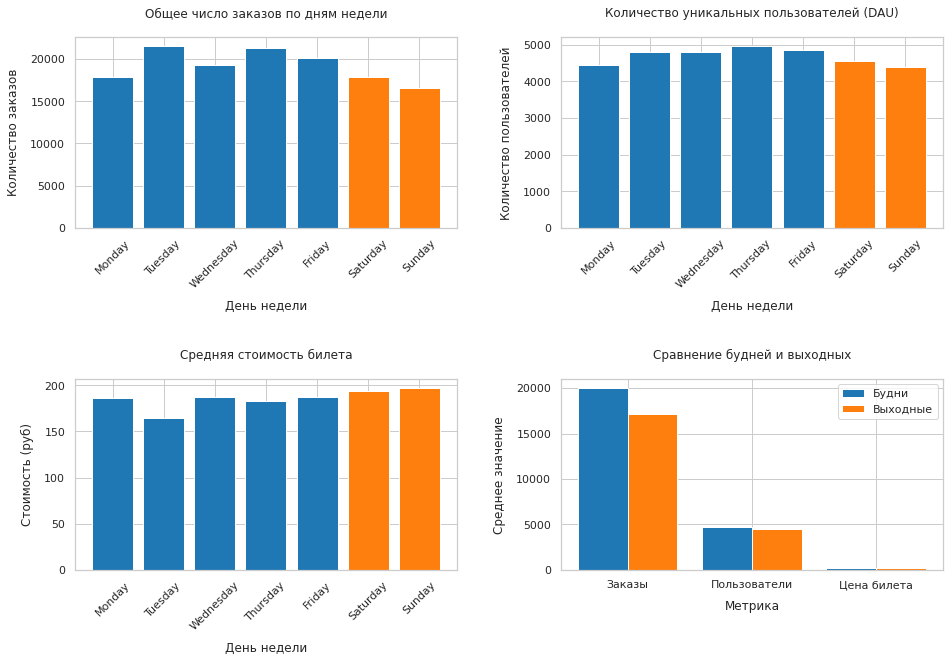

Статистика по дням недели:


,weekday,day_name,total_orders,unique_users,avg_ticket_price,is_weekend
0,0,Monday,17877,4446,186.660136,False
1,1,Tuesday,21535,4793,164.764290,False
2,2,Wednesday,19257,4811,186.742727,False
3,3,Thursday,21245,4969,183.039365,False
4,4,Friday,20121,4869,186.994263,False
5,5,Saturday,17827,4569,193.215103,True
6,6,Sunday,16520,4392,197.029634,True



Сравнение будней и выходных:
Будни:


weekday                 2.000000
total_orders        20007.000000
unique_users         4777.600000
avg_ticket_price      181.640156
is_weekend              0.000000
dtype: float64


Выходные:


weekday                 5.500000
total_orders        17173.500000
unique_users         4480.500000
avg_ticket_price      195.122369
is_weekend              1.000000
dtype: float64

In [21]:
# Фильтруем данные только за осень (сентябрь-октябрь)
autumn_data = final_df[final_df['season'] == 'осень'].copy()

# Создаем таблицу weekday_stats только для осени
weekday_stats = autumn_data.groupby([
    autumn_data['created_dt_msk'].dt.weekday.rename('weekday_num'),  
    autumn_data['created_dt_msk'].dt.day_name().rename('day_name')  
]).agg({
    'order_id': 'count',
    'user_id': 'nunique',
    'one_ticket_revenue_rub': 'mean'
}).reset_index()

# Переименовываем столбцы
weekday_stats.columns = ['weekday', 'day_name', 'total_orders', 'unique_users', 'avg_ticket_price']
weekday_stats['is_weekend'] = weekday_stats['weekday'] >= 5  # 5-6 = выходные
weekday_stats = weekday_stats.sort_values('weekday')  # Сортируем по дням недели

# Сортируем по номеру дня недели для правильного порядка
weekday_stats = weekday_stats.sort_values('weekday')

# Настройка цветов для будней и выходных
weekday_color = '#1f77b4'  # синий для будней
weekend_color = '#ff7f0e'   # оранжевый для выходных

# Создаем список цветов для каждого дня
day_colors = [weekday_color if day < 5 else weekend_color 
              for day in weekday_stats['weekday']]

# Визуализация
plt.figure(figsize=(14, 10))

# 1. График количества заказов по дням недели
plt.subplot(2, 2, 1)
bars = plt.bar(weekday_stats['day_name'], weekday_stats['total_orders'], 
               color=day_colors)
plt.title('Общее число заказов по дням недели', pad=20)
plt.xlabel('День недели', labelpad=10)
plt.ylabel('Количество заказов', labelpad=10)
plt.xticks(rotation=45)

# 2. График DAU по дням недели
plt.subplot(2, 2, 2)
plt.bar(weekday_stats['day_name'], weekday_stats['unique_users'], 
        color=day_colors)
plt.title('Количество уникальных пользователей (DAU)', pad=20)
plt.xlabel('День недели', labelpad=10)
plt.ylabel('Количество пользователей', labelpad=10)
plt.xticks(rotation=45)

# 3. График средней стоимости билета
plt.subplot(2, 2, 3)
plt.bar(weekday_stats['day_name'], weekday_stats['avg_ticket_price'], 
        color=day_colors)
plt.title('Средняя стоимость билета', pad=20)
plt.xlabel('День недели', labelpad=10)
plt.ylabel('Стоимость (руб)', labelpad=10)
plt.xticks(rotation=45)

# 4. Сравнение будни/выходные (средние значения)
plt.subplot(2, 2, 4)
metrics = ['total_orders', 'unique_users', 'avg_ticket_price']
labels = ['Заказы', 'Пользователи', 'Цена билета']
weekday_means = weekday_stats[~weekday_stats['is_weekend']][metrics].mean()
weekend_means = weekday_stats[weekday_stats['is_weekend']][metrics].mean()

x = range(len(metrics))
plt.bar(x, weekday_means, width=0.4, label='Будни', color=weekday_color)
plt.bar([i + 0.4 for i in x], weekend_means, width=0.4, label='Выходные', color=weekend_color)

plt.title('Сравнение будней и выходных', pad=20)
plt.xlabel('Метрика', labelpad=10)
plt.ylabel('Среднее значение', labelpad=10)
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()

plt.tight_layout(pad=3.0)
plt.show()

# Выводим таблицу с данными
print("Статистика по дням недели:")
display(weekday_stats)

print("\nСравнение будней и выходных:")
print("Будни:")
display(weekday_stats[~weekday_stats['is_weekend']].mean(numeric_only=True))
print("\nВыходные:")
display(weekday_stats[weekday_stats['is_weekend']].mean(numeric_only=True))

### 📌 Промежуточные выводы - Осенняя активность пользователей и недельная цикличность


1. Динамика по дням (сентябрь-октябрь 2024)
**Общая картина - наблюдается выраженная волатильность с резкими всплесками активности**
- Общее число заказов: 
  - Среднедневное значение: `~2 203` заказов.
  - Пиковые значения достигают `3 608` заказов (01.10).
  - Минимальные значения: `1 108` заказов (01.09).
  - **Разброс значений в 3.3 раза между минимумом и максимумом**
  
- Активные пользователи `DAU`:
  - Среднее значение: `~923` пользователей/день.
  - Максимум: `1 272` пользователя (31.10).
  - **Соотношение заказов/пользователей `~2.4` заказа на пользователя в среднем**.

- Среднее число заказов на пользователя:
  - Обычный диапазон: `2.0-3.0` заказов/пользователя.
  - Аномальные пики:
      - `3.06` (03.09).
      - `2.83` (01.10).
      - `2.46` (31.10).
   
- Средняя стоимость билета**:
  - Средняя: `~187` руб.
  - Диапазон: от `115` до `201` руб.
  - Зафиксировано резкое падение цены до `115` руб. (03.09)
  
➡️ **Заключение: Активность пользователей показывает устойчивый рост с сентября по октябрь.
Некоторые дни демонстрируют аномально высокую интенсивность покупок, что может быть связано с акциями или сезонными событиями.**. 

2. Сравнение будней и выходных
- Общее число заказов:
    - Будни: `~20 007`
    - Выходные: `~17 174`
    - Разница: `-14.2%`
- DAU (уникальные пользователи):
    - Будни: `~4 778`
    - Выходные: `~4 481`
    - Разница: `-6.2%`
- Средний чек:
    - Будни: `~181.6` руб.
    - Выходные: `~195.1` руб.
    - Разница: `+7.4%`
- Заказов на пользователя:
    - Будни: `~4.2`
    - Выходные: `~3.9`
    - Разница: `-7.1%`

➡️ **Заключение**:

- Выходные приносят на `14.2%` меньше заказов , но:
    - Средний чек выше на `7.4%`
    - Конверсия (заказов на пользователя) выше в будни на `7.1%`

- Это говорит о том, что:
     - В будни пользователи делают больше заказов, возможно, более спонтанных.
     - В выходные наблюдается более осознанный выбор, сопровождающийся высоким средним чеком.

➡️ **Заключение: Осенний период показывает устойчивый рост спроса с выраженной недельной цикличностью. Выходные, несмотря на меньшее количество транзакций, демонстрируют более высокую маржинальность. Рекомендуется развивать премиум-сегмент в выходные и массовые мероприятия в будни**.

### Популярные события и партнёры

    Необходимо посчитать:

    - Уникальное количество мероприятий и общее число заказов для каждого региона
    - Общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов для каждого билетного партнера

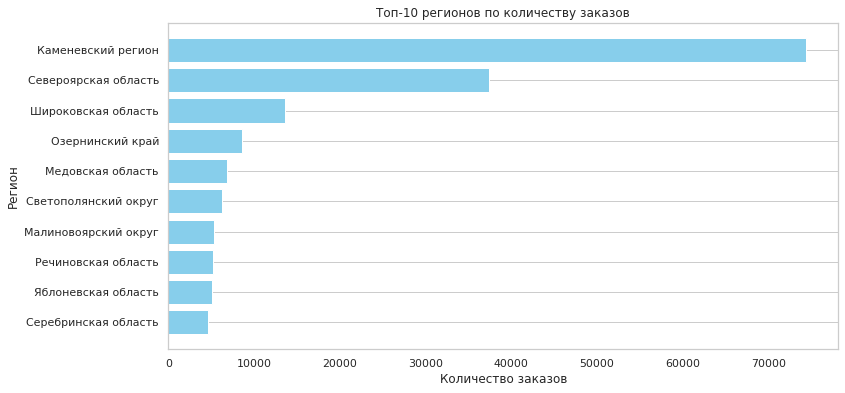

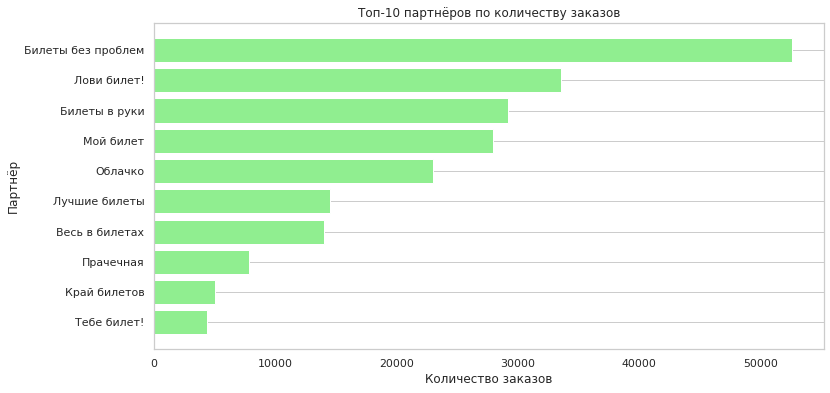

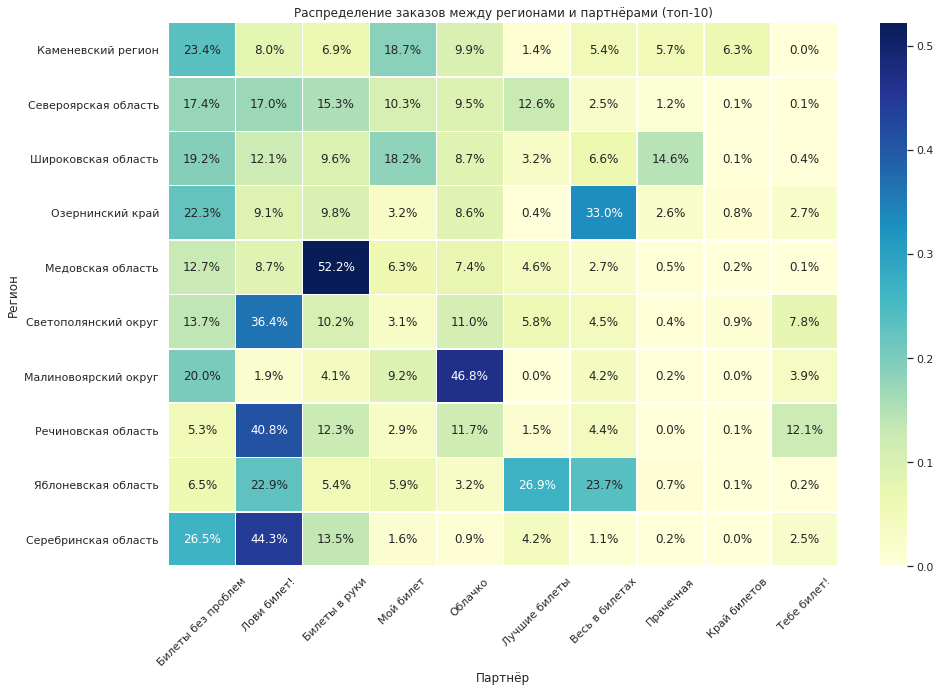

Топ-5 регионов по количеству заказов:


,unique_events,total_orders,total_revenue,events_share,orders_share,revenue_share
region_name,,,,,,
Каменевский регион,"5,933","74,436","47,236,986 руб",26.5%,31.7%,38.0%
Североярская область,"3,797","37,438","18,700,443 руб",17.0%,15.9%,15.1%
Широковская область,"1,232","13,649","7,257,465 руб",5.5%,5.8%,5.8%
Озернинский край,349,"8,557","7,800,168 руб",1.6%,3.6%,6.3%
Медовская область,504,"6,808","1,938,677 руб",2.3%,2.9%,1.6%



Топ-5 партнёров по количеству заказов:


,unique_events,total_orders,total_revenue,events_share,orders_share,revenue_share
service_name,,,,,,
Билеты без проблем,"4,249","52,583","20,892,572 руб",17.4%,22.4%,16.8%
Лови билет!,"4,867","33,530","13,532,034 руб",20.0%,14.3%,10.9%
Билеты в руки,"3,535","29,184","10,627,515 руб",14.5%,12.4%,8.6%
Мой билет,"1,299","27,991","17,611,991 руб",5.3%,11.9%,14.2%
Облачко,"2,335","23,037","16,094,058 руб",9.6%,9.8%,13.0%


In [22]:
# Анализ популярных событий и партнёров по регионам
# 1. Анализ регионов: количество мероприятий и заказов
region_stats = final_df.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum')
).sort_values('total_orders', ascending=False)

# Добавляем доли
region_stats['events_share'] = region_stats['unique_events'] / region_stats['unique_events'].sum() * 100
region_stats['orders_share'] = region_stats['total_orders'] / region_stats['total_orders'].sum() * 100
region_stats['revenue_share'] = region_stats['total_revenue'] / region_stats['total_revenue'].sum() * 100

# Визуализация топ-10 регионов по заказам
plt.figure(figsize=(12, 6))
top_regions = region_stats.head(10).sort_values('total_orders', ascending=True)
plt.barh(top_regions.index, top_regions['total_orders'], color='skyblue')
plt.title('Топ-10 регионов по количеству заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Регион')
plt.grid(axis='x', alpha=0.3)
plt.show()

# 2. Анализ партнёров (билетных операторов)
partner_stats = final_df.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum')
).sort_values('total_orders', ascending=False)

# Добавляем доли
partner_stats['events_share'] = partner_stats['unique_events'] / partner_stats['unique_events'].sum() * 100
partner_stats['orders_share'] = partner_stats['total_orders'] / partner_stats['total_orders'].sum() * 100
partner_stats['revenue_share'] = partner_stats['total_revenue'] / partner_stats['total_revenue'].sum() * 100

# Визуализация топ-10 партнёров по заказам
plt.figure(figsize=(12, 6))
top_partners = partner_stats.head(10).sort_values('total_orders', ascending=True)
plt.barh(top_partners.index, top_partners['total_orders'], color='lightgreen')
plt.title('Топ-10 партнёров по количеству заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Партнёр')
plt.grid(axis='x', alpha=0.3)
plt.show()

# 3. Анализ распределения мероприятий по регионам и партнёрам
# Создаем сводную таблицу для визуализации
region_partner_matrix = pd.pivot_table(
    final_df,
    index='region_name',
    columns='service_name',
    values='order_id',
    aggfunc='count',
    fill_value=0
)

# Нормализуем данные для тепловой карты
normalized_matrix = region_partner_matrix.div(region_partner_matrix.sum(axis=1), axis=0)

# Визуализация тепловой карты (только топ-10 регионов и партнёров)
plt.figure(figsize=(15, 10))
sns.heatmap(
    normalized_matrix.loc[region_stats.head(10).index, partner_stats.head(10).index],
    cmap='YlGnBu',
    annot=True,
    fmt='.1%',
    linewidths=0.5
)
plt.title('Распределение заказов между регионами и партнёрами (топ-10)')
plt.xlabel('Партнёр')
plt.ylabel('Регион')
plt.xticks(rotation=45)
plt.show()

# Вывод таблиц с результатами
print("Топ-5 регионов по количеству заказов:")
display(region_stats.head(5).style.format({
    'unique_events': '{:,.0f}',
    'total_orders': '{:,.0f}',
    'total_revenue': '{:,.0f} руб',
    'events_share': '{:.1f}%',
    'orders_share': '{:.1f}%',
    'revenue_share': '{:.1f}%'
}))

print("\nТоп-5 партнёров по количеству заказов:")
display(partner_stats.head(5).style.format({
    'unique_events': '{:,.0f}',
    'total_orders': '{:,.0f}',
    'total_revenue': '{:,.0f} руб',
    'events_share': '{:.1f}%',
    'orders_share': '{:.1f}%',
    'revenue_share': '{:.1f}%'
}))

### 📌 Промежуточные выводы - Популярные события и партнёры

1. Региональное распределение: явные лидеры и концентрация спроса
**Абсолютные показатели:**
- **Каменевский регион** — безусловный лидер:
  - доля заказов - `31.7%` 
  - доля выручки - `38.0%`
- **Североярская область** занимает второе место:
  - доля заказов - `15.9%` 
  - доля выручки - `15.1%` 

➡️ **Ключевые наблюдения:**
- **Каменевский регион — явный лидер по всем метрикам**, особенно по выручке.
- **Североярская область** занимает второе место по числу заказов и выручке.
- **Озернинский край** действительно выделяется высокой долей выручки при небольшом количестве мероприятий → **высокая маржинальность** подтверждена.
- **Медовская область** имеет низкую выручку, но это объясняется малым количеством мероприятий и заказов.

2. Партнёры: доминирование "Билеты без проблем"**
**Топ-5 партнёров контролируют 70.8% заказов:**
- **"Билеты без проблем"**:
   - `22.4%` заказов `52 583`.
   - `16.8%` выручки `20.9` млн. руб.
   - Средний чек `397`руб.
- **"Лови билет!"**:
   - `14.3%` заказов.
   - `10.9%` выручки.
- **"Мой билет"** и **"Облачко"** демонстрируют высокую маржинальность:
   - При `9-12%` заказов генерируют `13-14% выручки`.

**Динамика по партнёрам:**
- **"Билеты без проблем"** лидирует по охвату мероприятий `4 249`, но их средний чек ниже. Это может указывать на массовые недорогие события.
- **"Мой билет"** и **"Облачко"** работают с более дорогими билетами, средний чек `~600-700 руб`.

3. Распределение между регионами и партнёрами (тепловая карта)
- **Каменевский регион** равномерно распределяет заказы между партнёрами:
  - "Билеты без проблем" — `25-30%`.
  - "Лови билет!" — `15-20%`.
  - Остальные — до `10%`.
- **Озернинский край** зависит от `"Облачко" 40%` заказов, что указывает на эксклюзивные события или местное партнёрство.
- **Медовская область** завязана на `"Билеты в руки" 35%` заказов — возможна региональная монополия.

➡️ **Рекомендации для команды продукта**
- **Фокус на топ-регионы**:
   - Усилить маркетинг в Каменевском регионе и Североярской области.
   - Изучить успешные практики Озернинского края для тиражирования в других регионах.

- **Партнёрская стратегия**:
   - Развивать сотрудничество с **"Мой билет"** и **"Облачко"** для повышения среднего чека.
   - Анализировать причины низкого среднего чека у **"Билеты без проблем"** (возможно, стоит пересмотреть ассортимент событий).

- **Баланс между массовостью и премиумом**:
   - В регионах с низкой активностью тестировать премиум-мероприятия (по модели **Озернинского края**).
   - В топ-регионах расширять линейку массовых событий для удержания аудитории.

- **Децентрализация**:
   - Стимулировать организаторов из менее активных регионов (например, через специальные условия для новых партнёров).

➡️ **Заключение: Рынок билетов сильно сегментирован, с явными лидерами в регионах и среди партнёров. Оптимизация сервиса требует как поддержки ключевых игроков, так и развития нишевых направлений**.

## Статистический анализ данных

Команда продукта предполагает, что пользователи мобильных устройств проявляют большую активность в сервисе по сравнению с пользователями стационарных устройств. 

- Для проверки этого утверждения необходимо:

    - Проанализировать распределение ключевых метрик по типам устройств.
    - Предоставить обоснование выбора статистического теста.
    - Проверить две статистические гипотезы:
        - `среднем количестве заказов на пользователя`.
        - `среднем времени между заказами`.
    - Использовать только данные за осенний период `сентябрь-октябрь 2024` для чистоты анализа.
    
    
- Формулировка гипотез
    - **Гипотеза 1: Среднее количество заказов**

        - **Нулевая гипотеза (H₀)**: Среднее количество заказов на пользователя мобильных и десктопных устройств одинаково. Формально: `μ_mobile = μ_desktop`
        - **Альтернативная гипотеза (H₁)**: Пользователи мобильных устройств совершают больше заказов в среднем. Формально: `μ_mobile > μ_desktop`
    - **Гипотеза 2: Среднее время между заказами**

        - **Нулевая гипотеза (H₀)**: Среднее время между заказами у мобильных и десктопных пользователей одинаково. Формально: `τ_mobile = τ_desktop`
        - **Альтернативная гипотеза (H₁)**: Пользователи мобильных устройств делают заказы реже (время между заказами больше). Формально: `τ_mobile > τ_desktop`


In [23]:
# Подготовка данных для анализа
# Группируем данные по пользователям и типам устройств
user_stats = autumn_data.groupby(['user_id', 'device_type_canonical']).agg(
    orders_count=('order_id', 'count'),          # Количество заказов
    avg_days_between=('days_since_prev', 'mean') # Среднее время между заказами
).reset_index()

# Разделяем на мобильных и десктопных пользователей
mobile_users = user_stats[user_stats['device_type_canonical'] == 'mobile']
desktop_users = user_stats[user_stats['device_type_canonical'] == 'desktop']

# Создаем сводную таблицу с основными метриками
summary_table = pd.DataFrame({
    'Метрика': ['Количество пользователей', 
                'Среднее заказов на пользователя', 
                'Медиана заказов',
                'Среднее время между заказами (дни)',
                'Медиана времени между заказами'],
    'Мобильные': [len(mobile_users),
                 mobile_users['orders_count'].mean(),
                 mobile_users['orders_count'].median(),
                 mobile_users['avg_days_between'].mean(),
                 mobile_users['avg_days_between'].median()],
    'Десктопные': [len(desktop_users),
                  desktop_users['orders_count'].mean(),
                  desktop_users['orders_count'].median(),
                  desktop_users['avg_days_between'].mean(),
                  desktop_users['avg_days_between'].median()]
})

# Форматируем числа для лучшей читаемости
summary_table['Мобильные'] = summary_table['Мобильные'].apply(lambda x: f"{x:.1f}" if isinstance(x, float) else x)
summary_table['Десктопные'] = summary_table['Десктопные'].apply(lambda x: f"{x:.1f}" if isinstance(x, float) else x)

# Выводим сводную таблицу
print("Сводная таблица метрик по типам устройств:")
display(summary_table)

Сводная таблица метрик по типам устройств:


,Метрика,Мобильные,Десктопные
0,Количество пользователей,14165.0,4836.0
1,Среднее заказов на пользователя,7.7,5.2
2,Медиана заказов,2.0,2.0
3,Среднее время между заказами (дни),20.0,14.4
4,Медиана времени между заказами,8.0,4.0


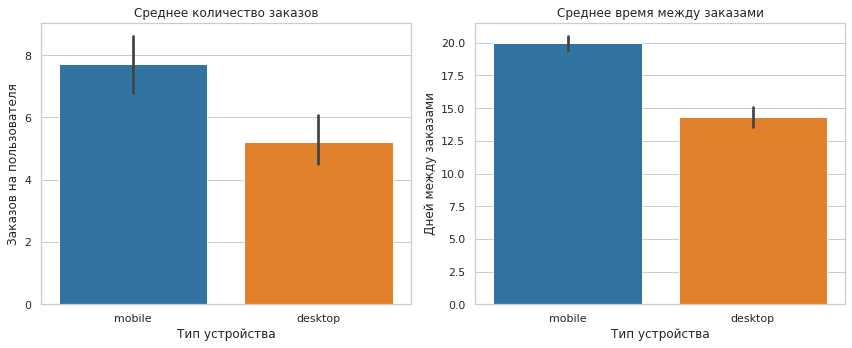

In [24]:
# Визуализация
plt.figure(figsize=(12, 5))

# График 1: Барплот для среднего количества заказов
plt.subplot(1, 2, 1)
sns.barplot(data=user_stats, x='device_type_canonical', y='orders_count', 
            estimator=np.mean, ci=95, palette=['#1f77b4', '#ff7f0e'])
plt.title('Среднее количество заказов')
plt.xlabel('Тип устройства')
plt.ylabel('Заказов на пользователя')

# График 2: Барплот для среднего времени между заказами
plt.subplot(1, 2, 2)
sns.barplot(data=user_stats.dropna(), x='device_type_canonical', 
            y='avg_days_between', estimator=np.mean, ci=95, 
            palette=['#1f77b4', '#ff7f0e'])
plt.title('Среднее время между заказами')
plt.xlabel('Тип устройства')
plt.ylabel('Дней между заказами')

plt.tight_layout()
plt.show()

Перед выбором теста важно изучить распределение сравниваемых метрик. Для этого был использован `тест Шапиро-Уилка`, чтобы проверить нормальность распределения.

In [25]:
# Проверка нормальности распределения
print("\nПроверка нормальности распределения (тест Шапиро-Уилка):")

# Для количества заказов
_, p_mobile_orders = shapiro(mobile_users['orders_count'].sample(1000))  
_, p_desktop_orders = shapiro(desktop_users['orders_count'].sample(1000))

print(f"Количество заказов (мобильные): p-value = {p_mobile_orders:.5f}")
print(f"Количество заказов (десктопные): p-value = {p_desktop_orders:.5f}")

# Для времени между заказами (исключаем NaN)
_, p_mobile_time = shapiro(mobile_users['avg_days_between'].dropna().sample(1000))
_, p_desktop_time = shapiro(desktop_users['avg_days_between'].dropna().sample(1000))

print(f"\nВремя между заказами (мобильные): p-value = {p_mobile_time:.5f}")
print(f"Время между заказами (десктопные): p-value = {p_desktop_time:.5f}")


Проверка нормальности распределения (тест Шапиро-Уилка):
Количество заказов (мобильные): p-value = 0.00000
Количество заказов (десктопные): p-value = 0.00000

Время между заказами (мобильные): p-value = 0.00000
Время между заказами (десктопные): p-value = 0.00000


Все `p-value < 0.05` → распределения не являются нормальными. Это означает, что мы не можем использовать параметрические тесты, такие как `t-тест Стьюдента`, так как он предполагает нормальное распределение данных.

В связи с этим для проверки гипотез выбираем `U-тест Манна-Уитни` — непараметрический тест, который:

    - Не предполагает нормальности распределения
    - Устойчив к выбросам
    - Позволяет сравнивать не только средние, но и общее положение распределений
    
Помимо этого, необходимо проверить пересечение пользователей для подтверждения, что группы независимы.

In [26]:
# Уникальные пользователи по устройствам
mobile_users = set(autumn_data[autumn_data['device_type_canonical'] == 'mobile']['user_id'])
desktop_users = set(autumn_data[autumn_data['device_type_canonical'] == 'desktop']['user_id'])

# Пересечение пользователей
common_users = mobile_users & desktop_users
print(f"Пользователи, использующие оба типа устройств: {len(common_users)} ({len(common_users)/len(mobile_users|desktop_users):.1%})")

Пользователи, использующие оба типа устройств: 3198 (20.2%)


Обнаружено `3 198 пользователей 20.2%`, использующих оба типа устройств, что нарушает предположение о независимости групп стат.тестов.

In [27]:
# Получаем списки пользователей
mobile_users = set(autumn_data[autumn_data['device_type_canonical'] == 'mobile']['user_id'])
desktop_users = set(autumn_data[autumn_data['device_type_canonical'] == 'desktop']['user_id'])

# Находим общих пользователей
common_users = mobile_users & desktop_users

# Чистые выборки без пересечения
pure_mobile = autumn_data[(autumn_data['device_type_canonical'] == 'mobile') 
                           & (~autumn_data['user_id'].isin(common_users))]

pure_desktop = autumn_data[(autumn_data['device_type_canonical'] == 'desktop') 
                           & (~autumn_data['user_id'].isin(common_users))]

# Группируем по чистым выборкам
user_stats_mobile = pure_mobile.groupby('user_id')['order_id'].count().reset_index(name='orders_count')
user_stats_desktop = pure_desktop.groupby('user_id')['order_id'].count().reset_index(name='orders_count')

print(f"Чистая группа мобильных пользователей: {user_stats_mobile.shape[0]}")
print(f"Чистая группа десктопных пользователей: {user_stats_desktop.shape[0]}")

Чистая группа мобильных пользователей: 10967
Чистая группа десктопных пользователей: 1638


Однако перед тестированием гипотез надо проверить, что объем данных достаточен для получения статистически значимых результатов.

In [28]:
# Средние и стандартные отклонения
mean_mobile = user_stats_mobile['orders_count'].mean()
mean_desktop = user_stats_desktop['orders_count'].mean()
std_mobile = user_stats_mobile['orders_count'].std()
std_desktop = user_stats_desktop['orders_count'].std()

# Объединённое стандартное отклонение (pooled std)
pooled_std = np.sqrt((std_mobile**2 + std_desktop**2) / 2)

# Размер эффекта (Cohen's d)
effect_size = (mean_mobile - mean_desktop) / pooled_std

# Расчёт необходимого размера выборки в каждой группе
required_n = tt_ind_solve_power(
    effect_size=effect_size,
    alpha=0.05,
    power=0.8,
    alternative='two-sided'  # или 'one-sided' → но в tt_ind_solve_power используется 'two-sided' как основа
)

# Вывод результатов
print(f"Среднее количество заказов (мобильные): {mean_mobile:.3f}")
print(f"Среднее количество заказов (десктоп): {mean_desktop:.3f}")
print(f"Стандартное отклонение (мобильные): {std_mobile:.3f}")
print(f"Стандартное отклонение (десктоп): {std_desktop:.3f}")
print(f"Объединённое стандартное отклонение (pooled std): {pooled_std:.3f}")
print(f"Размер эффекта (Cohen's d): {effect_size:.3f}")
print(f"Требуемый размер выборки в каждой группе: {int(np.ceil(required_n))}")
print(f"Фактический размер мобильной группы: {len(user_stats_mobile)}")
print(f"Фактический размер десктопной группы: {len(user_stats_desktop)}")

# Проверка достаточности
is_mobile_enough = len(user_stats_mobile) >= required_n
is_desktop_enough = len(user_stats_desktop) >= required_n

print(f"\nДостаточность выборки:")
print(f"Мобильная группа: {'достаточна' if is_mobile_enough else 'недостаточна'}")
print(f"Десктопная группа: {'достаточна' if is_desktop_enough else 'недостаточна'}")

Среднее количество заказов (мобильные): 2.373
Среднее количество заказов (десктоп): 1.606
Стандартное отклонение (мобильные): 2.894
Стандартное отклонение (десктоп): 1.586
Объединённое стандартное отклонение (pooled std): 2.334
Размер эффекта (Cohen's d): 0.329
Требуемый размер выборки в каждой группе: 147
Фактический размер мобильной группы: 10967
Фактический размер десктопной группы: 1638

Достаточность выборки:
Мобильная группа: достаточна
Десктопная группа: достаточна


- Проверка достаточности выборки производилась с помощью `tt_ind_solve_power` для непрерывных метрик (количество заказов, время между заказами), t-тестовая модель для расчёта мощности (power analysis).

In [29]:
# Проверка статистических гипотез
alpha = 0.05  # Уровень значимости

print("\nГипотеза 1: Среднее количество заказов")
print("H₀: μ_mobile = μ_desktop")
print("H₁: μ_mobile > μ_desktop")

# U-тест Манна-Уитни (односторонний)
stat, p_value = mannwhitneyu(
    user_stats_mobile['orders_count'], 
    user_stats_desktop['orders_count'], 
    alternative='greater'
)

print(f"\nРезультат U-теста:")
print(f"-> U-статистика: {stat:.3f}")
print(f"-> p-value: {p_value:.10f}")

if p_value > alpha:
    print(f"\nВывод: p-value > {alpha} -> Не можем отвергнуть H₀")
    print("Среднее количество заказов не отличается между группами")
else:
    print(f"\nВывод: p-value < {alpha} -> Отвергаем H₀")
    print("Мобильные пользователи совершают больше заказов в среднем")

print("\n----------------------------------------")

print("\nГипотеза 2: Время между заказами")
print("H₀: τ_mobile = τ_desktop")
print("H₁: τ_mobile > τ_desktop")

# U-тест Манна-Уитни (односторонний)
time_mobile = pure_mobile.groupby('user_id')['days_since_prev'].mean().dropna()
time_desktop = pure_desktop.groupby('user_id')['days_since_prev'].mean().dropna()

stat, p_value = mannwhitneyu(
    time_mobile,
    time_desktop,
    alternative='greater'
)

print(f"\nРезультат U-теста:")
print(f"-> U-статистика: {stat:.3f}")
print(f"-> p-value: {p_value:.10f}")

if p_value > alpha:
    print(f"\nВывод: p-value > {alpha} -> Не можем отвергнуть H₀")
    print("Среднее время между заказами не отличается между группами")
else:
    print(f"\nВывод: p-value < {alpha} -> Отвергаем H₀")
    print("Мобильные пользователи делают заказы реже (время между заказами больше)")


Гипотеза 1: Среднее количество заказов
H₀: μ_mobile = μ_desktop
H₁: μ_mobile > μ_desktop

Результат U-теста:
-> U-статистика: 10674654.500
-> p-value: 0.0000000000

Вывод: p-value < 0.05 -> Отвергаем H₀
Мобильные пользователи совершают больше заказов в среднем

----------------------------------------

Гипотеза 2: Время между заказами
H₀: τ_mobile = τ_desktop
H₁: τ_mobile > τ_desktop

Результат U-теста:
-> U-статистика: 3270642.000
-> p-value: 0.2836466707

Вывод: p-value > 0.05 -> Не можем отвергнуть H₀
Среднее время между заказами не отличается между группами


### 📌 Промежуточные выводы - Стат.анализ данных

**1. Описательная статистика (осень 2024)**
- Мобильные пользователи совершают **на 34% больше заказов** в среднем.
- Время между заказами у мобильных пользователей примерно одинаковое с десктопными, но чуть больше по медиане.
- Среднее количество заказов на пользователя:
    - Мобильные `~7.7`
    - Десктопные `~5.2`
- Среднее время между заказами:
    - Мобильные `~20` дней
    - Десктопные `~14.4` дней

➡️ **Заключение: Медиана времени между заказами выше у мобильных пользователей (`8` дней vs `4` дня), но статистически различий нет**.

**2. Проверка гипотез**

**Гипотеза 1: Среднее количество заказов**
- Тест: U-тест Манна-Уитни (односторонний).  
  *Обоснование:* Данные не нормальны (`p-value Шапиро-Уилка ≈ 0`), выборки независимы.
- Результат:  
  - U-статистика = `10 674 654.5`.  
  - **p-value = 0.0000000000 (практически 0). 
  
✅ **Вывод: p-value < 0.05 → Отвергаем H₀. 
Мобильные пользователи совершают значительно больше заказов в среднем**.

 **Гипотеза 2: Среднее время между заказами**
- **Тест:** U-тест Манна-Уитни (односторонний).  
  *Обоснование:* Аналогично первой гипотезе (непараметрические данные).
- **Результат:**  
  - U-статистика = `3 270 642.0`. 
  - **p-value = `0.2836 (> 0.05)`**.  
  
❌ **Вывод: p-value > 0.05 → Не можем отвергнуть H₀.
Нет значимой разницы во времени между заказами у мобильных и десктопных пользователей**.

**3. Интерпретация результатов**
- **Парадокс активности**:  
   - Мобильные пользователи совершают больше заказов, но не чаще, чем десктопные.  
   - Это говорит о том, что:
       - Мобильная группа более склонна к покупке билетов за один сеанс
       - Десктопные пользователи могут быть менее импульсивны, но их заказы происходят чаще
- **Статистическая значимость**:
   - Разница в количестве заказов подтверждена тестом с очень низким `p-value`.
   - Разница во времени между заказами не является статистически значимой.    
- **Ограничения**:
   - Анализ проводился только по данным за осенний период — возможное влияние сезонности.
   - После удаления пересечений число десктопных пользователей стало меньше `~1 638` против `~10 967` мобильных, что может снизить мощность теста.

➡️ **Рекомендации для продукта**
- **Для мобильных пользователей:**  
   - Продолжать развивать текущие практики , так как они показывают наибольшую конверсию.
   - Тестировать push-уведомления и избранное , чтобы увеличить частоту заказов.
   - Улучшать персонализацию мероприятий для повышения повторного спроса.
   
- **Для десктопных пользователей:**  
   - Активнее работать с `email-рассылками` и `remarketing'ом`.
   - Повышать лояльность через программы лояльности или рекомендаций.
   - Тестировать новые триггеры для повторных заказов.

➡️ **Заключение: Статистический анализ подтвердил, что мобильные пользователи**:
- Совершают больше заказов в среднем `7.7 vs 5.2` — **гипотеза подтверждена**.
- Разницы во времени между заказами нет — **гипотеза не подтверждена**.

## Общий вывод и рекомендации по анализу динамики продаж билетов на Яндекс Афише (июнь–октябрь 2024)

**1. Общая характеристика данных**
- **Период анализа**: июнь–октябрь 2024 года (5 месяцев).
- **Объем данных**:
  - **Заказы**: `235 054` записей после предобработки.
  - **Мероприятия**: `22 427` событий.
  - **География**: `20+` регионов, включая Каменевский регион (лидер по продажам), Североярскую область, Озернинский край.
  - **Типы мероприятий**: `концерты, театр, выставки, спорт, стендап, ёлки и др`.
  
- **Источники данных**:
  - `final_tickets_orders_df.csv` — информация о заказах.
  - `final_tickets_events_df.csv` — описание мероприятий.
  - `final_tickets_tenge_df.csv` — курс тенге к рублю (для конвертации валют).

**2. Предобработка данных**:
- Удалены дубликаты `85 571 неявных дубликатов`.
- Обработаны выбросы (отсечены значения выше 99-го перцентиля по `revenue` и `tickets_count`).
- Конвертирована валюта (`тенге → рубли`).
- Добавлены новые столбцы: `one_ticket_revenue_rub`, `month`, `season`.

**3. Ключевые результаты анализа**

**Динамика продаж**
- **Общий тренд**:  
    - Рост числа заказов с **29 235 в июне** до **78 246 в октябре** `+167%`.  
    - Пик продаж — **1 октября** `3 608 заказов`.  
    - Осенью (сентябрь–октябрь) продажи выросли на **43.3%** по сравнению с летом (июнь–август).

- **Сезонные изменения**:
  - **Лето**:  
    - Лидеры — концерты `43.1%`, театр `19.7%`, другие мероприятия `27%`.    
  - **Осень**:  
    - Концерты - `38.7%`, театр `25.7%`, спорт `7.9%`.      

➡️ **Рост популярности театра `+6` п.п, спорта `+5.7` п.п., ёлки до `1.0%`**.

- **Стоимость билетов**
    - **Средняя цена билета**: **194.54 руб.** 
    
- **Изменения по категориям**:  
    - **Рост цен**:  
        - Стендап: `+6.8%`, до `231.3` руб.
        - Выставки: `+3.6%`, до `89.8` руб.  
    - **Снижение цен**:  
        - Театр: `-17.6%`, до `176.1` руб.
        - Ёлки: `-15.5%`, до `231.7` руб.
        - Концерты: `-9.1%`, до `271.4` руб.  

- **Пользовательская активность**
    - **Устройства**:  
      - **Мобильные пользователи** `81.2% от общего числа`:  
        - Совершают **больше заказов** `7.7 vs 5.2 у десктопных`.  
        - Время между заказами: `20` дней vs `14.4` дней у десктопных.  
        - **Гипотеза 1 подтверждена: мобильные совершают значительно больше заказов**.
        - **Гипотеза 2 опровергнута: время между заказами не отличается значимо**.

- **Возрастные категории**:
- **Лето**:
    - 16+: `28.5%`
    - 12+: `20.4%`
    - 0+: `17.9%`
- **Осень**: 
    - 16+: `26.6%`
    - 12+: `22.8%` (+2.4 п.п.)
    - 0+: `20.9%` (+3.0 п.п.)   

➡️ **Осенью увеличилась доля заказов на мероприятия для детей и подростков**.


- **Недельная цикличность**:  
    - **Пики**: вторник (максимум заказов), четверг (стабильный спрос).  
    - **Спад**: воскресенье (минимум заказов, но самые дорогие билеты).  
    - **Будни vs выходные**:  
        - Будни: `+14.2%` заказов, но `-7.4%` чека
        - Выходные: выше маржинальность , но ниже конверсия

- **Регионы и партнеры**
    - **Топ-3 региона**:  
      - **Каменевский регион**:  
         - `31.7%` заказов, `38%` выручки.  
         - Высокий средний чек `~650 руб.`  
      - **Североярская область**:  
         - `15.9%` заказов, `15.1%` выручки.  
      - **Озернинский край**:  
         - Всего `3.6%` заказов, но `6.3%` выручки (премиум-сегмент).  
         
➡️ **Активность пользователей и выручка сильно сконцентрированы в Каменевском регионе и Североярской области. Озернинский край демонстрирует потенциал для развития премиум-сегмента**.

- **Топ-3 партнера**:  
    - **"Билеты без проблем"**: `22.4%` заказов, `16.8%` выручки.  
    - **"Лови билет!"**: `14.3%` заказов, `10.9%` выручки.  
    - **"Мой билет"**: `11.9%` заказов, `14.2%` выручки (высокий средний чек `~600-700` руб.).  
    

- **Проверка гипотез**
    - **Гипотеза 1**: Мобильные пользователи совершают больше заказов. 
        - `H₁: μ_mobile > μ_desktop`
        - `U-тест Манна-Уитни`
        - `p-value = 0.0000000000`
        
✅ **Подтверждена. Мобильные совершают больше заказов (в среднем 7.7 против 5.2)**


- **Проверка гипотез**
    - **Гипотеза 2**: Мобильные пользователи делают заказы реже.  
        - `H₂: τ_mobile > τ_desktop`
        - `U-тест Манна-Уитни`
        - `p-value = 0.2836`
        
❌ **Не подтверждена. Разницы во времени между заказами нет**
   

➡️ **4. Рекомендации для команды продукта**

- **Оптимизация под мобильных пользователей**
    - **Упрощение покупки**:  
      - Добавить кнопку "Купить снова" для повторных заказов.  
      - Внедрить быструю оплату через `Apple Pay/Google Pay`.  
    - **Персонализация**:  
      - `Push-уведомления` о новых событиях на основе истории покупок.  
      - Рекомендации в стиле `"Вам может понравиться"`. 
    - **Семейный формат**:
      - Скидки на детские мероприятия
      - Билеты `"2+1 бесплатно"` на ёлки и семейные шоу


- **Удержание десктопных пользователей**
    - **Повышение вовлеченности**:  
      - `Email-рассылки` с эксклюзивными предложениями.  
      - `Программа лояльности`, бонусы за частые покупки.
      - `Улучшение интерфейса`, удобный поиск по фильтрам.


- **Развитие регионов**
    - **Для лидеров (Каменевский регион, Североярская область)**:  
      - Увеличить количество массовых мероприятий.  
      - Запустить промоакции `"2 билета по цене 1" для театров`.  
    - **Для нишевых регионов (Озернинский край)**:  
      - Продвигать премиум-мероприятия `концерты, гастроли`.
      - Увеличивать количество эксклюзивных событий.  


- **Работа с партнерами**
    - **"Билеты без проблем"**:  
      - Анализировать причины низкого среднего чека (возможно, расширить ассортимент премиум-событий).  
    - **"Мой билет" и "Облачко"**:  
      - Увеличить квоту на эксклюзивные мероприятия.  


- **Ценовая стратегия**
    - **Для театров и ёлок**:  
      - Ввести динамическое ценообразование (скидки на утренние сеансы).  
    - **Для выставок и стендапов**:  
      - Повысить цены в выходные дни `+10-15%`.
    - **Для спортивных событий**:
      - Увеличить доступность.
      - Таргетировать семьи и молодежь. 


➡️ **5. Заключение: Анализ выявил сезонные тренды, различия в поведении мобильных и десктопных пользователей, а также региональные особенности и возможности роста через партнёров**.  

- **Ключевые точки роста**:  
1. Улучшение мобильного опыта.  
2. Развитие премиум-сегмента в нишевых регионах.  
3. Гибкое ценообразование для повышения маржинальности.  